In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Checking the current directory

%pwd

'C:\\Users\\priya'

### Changing the directory

In [3]:
os.chdir(r'A:\Analytix\python projects\basic statistics hypothesis(case study 6)')

## Problem 1

In [4]:
loan_data = pd.read_csv(r'LoansData.csv')

In [5]:
#Renaming the columns
loan_data.rename(columns = {'Interest.Rate':'Int_Rate','Amount.Requested':'Amt_Rqstd','Amount.Funded.By.Investors':'Amt_Invstd','Loan.Length':'period','Loan.Purpose':'Purpose','Debt.To.Income.Ratio':'Debt_2_ratio','Home.Ownership':'Ownership','Monthly.Income':'Income','FICO.Range':'FICO_Range','Open.CREDIT.Lines':'Open_crdt_lne','Revolving.CREDIT.Balance':'Balance','Inquiries.in.the.Last.6.Months':'Inquiries','Employment.Length':'Empymnt_Len'},inplace=True)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Amt_Rqstd      2499 non-null   float64
 1   Amt_Invstd     2499 non-null   float64
 2   Int_Rate       2498 non-null   object 
 3   period         2500 non-null   object 
 4   Purpose        2500 non-null   object 
 5   Debt_2_ratio   2499 non-null   object 
 6   State          2500 non-null   object 
 7   Ownership      2499 non-null   object 
 8   Income         2499 non-null   float64
 9   FICO_Range     2498 non-null   object 
 10  Open_crdt_lne  2497 non-null   float64
 11  Balance        2497 non-null   float64
 12  Inquiries      2497 non-null   float64
 13  Empymnt_Len    2423 non-null   object 
dtypes: float64(6), object(8)
memory usage: 273.6+ KB


In [7]:
loan_data.isnull().sum()

Amt_Rqstd         1
Amt_Invstd        1
Int_Rate          2
period            0
Purpose           0
Debt_2_ratio      1
State             0
Ownership         1
Income            1
FICO_Range        2
Open_crdt_lne     3
Balance           3
Inquiries         3
Empymnt_Len      77
dtype: int64

In [8]:
#Filling up the NA values by Mean for Float datatype & by Mode for object datatype 
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)
    else:
        loan_data[col].fillna(loan_data[col].mean(), inplace=True)

In [9]:
# Stripping the Interest column and converting it to float type
loan_data['Int_Rate']=loan_data['Int_Rate'].str.strip("%").astype(float)

In [10]:
# Stripping the Interest column and converting it to float type
loan_data['Debt_2_ratio']=loan_data['Debt_2_ratio'].str.strip("%").astype(float)

In [11]:
# Converting the FICO_Range into float type as "F_score" & dropping "FICO_Range"
Range=loan_data['FICO_Range'].str.split("-",expand=True).astype(float)
Range.columns=['lower','upper']
loan_data['F_score'] = (Range.lower+Range.upper)/2
loan_data.drop(columns='FICO_Range',inplace=True)

In [12]:
#Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

#Getting labelEncoder under lbl_encoder
lbl_encoder=LabelEncoder()

#Encoding the "Period" column & asving it under "Encoded_period"(36 Months = 0 & 60 Months = 1)
loan_data['Encoded_period'] = lbl_encoder.fit_transform(loan_data[['period']])

#dropping the str type period column
loan_data.drop(columns='period', inplace=True)

### Ecoding used for different Purpose

#### "car=0","credit_card=1","debt_consolidation=2","educational=3","home_improvement=4","house=5" 

#### "major_purchase=6","medical=7","moving =8","other =9","renewable_energy=10","small_business=11"

#### "vacation=12","wedding=13"

In [13]:
#Encoding the "Purpose" column & asving it under "Encoded_Purpose"
loan_data['Encoded_Purpose'] = lbl_encoder.fit_transform(loan_data[['Purpose']])


#dropping the str type Purpose column
loan_data.drop(columns='Purpose', inplace=True)

### Ecoding used for different Ownership

#### "MORTGAGE=0","NONE=1","OTHER=2","OWN=3","RENT=4"

In [14]:
#Encoding the "Ownership" column & asving it under "Encoded_Ownership"
loan_data['Encoded_Ownership'] = lbl_encoder.fit_transform(loan_data[['Ownership']])


#dropping the str type Purpose column
loan_data.drop(columns='Ownership', inplace=True)

In [15]:
loan_data.drop(columns=['State','Empymnt_Len'],inplace=True)

<AxesSubplot:>

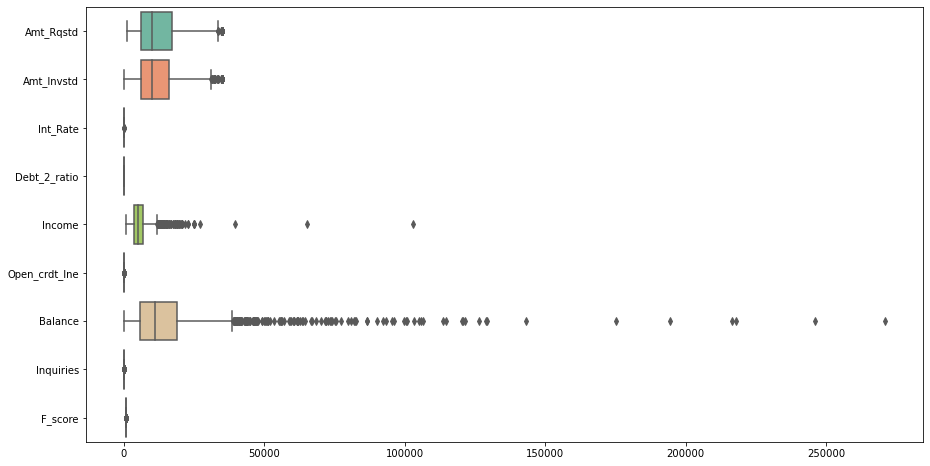

In [16]:
# Checking for outliers
plt.figure(figsize=(15,8))
col_list = ['Amt_Rqstd','Amt_Invstd','Int_Rate','Debt_2_ratio','Income','Open_crdt_lne','Balance','Inquiries','F_score']
sns.boxplot(data=loan_data[col_list],orient="h",palette="Set2")

In [17]:
# outlier treatment (Replacing outliers with the median value for each columns)
for col in loan_data.columns:
        loan_data[col] = np.where(loan_data[col] > loan_data[col].quantile(0.95) ,
                                    loan_data[col].median(), loan_data[col])

<Figure size 1440x1296 with 0 Axes>

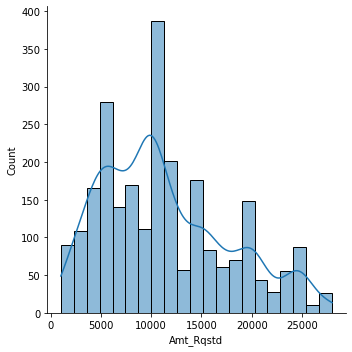

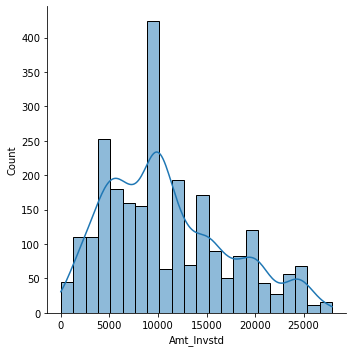

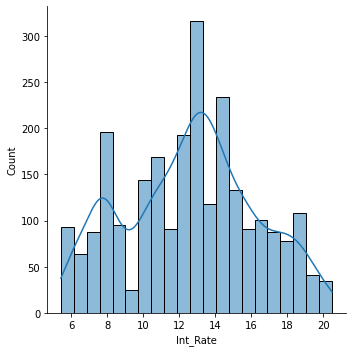

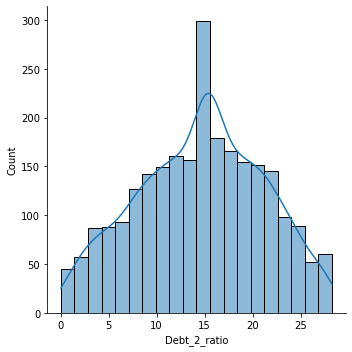

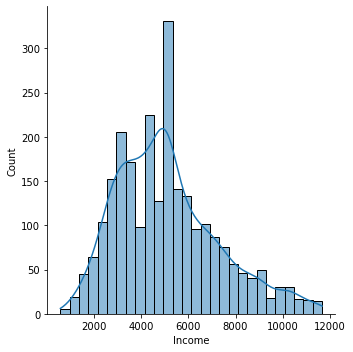

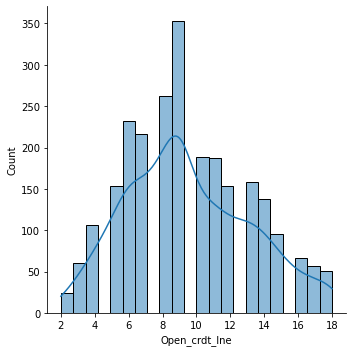

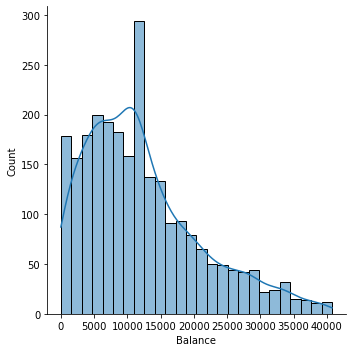

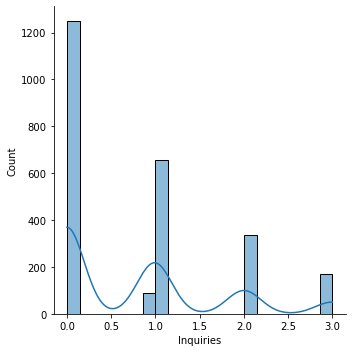

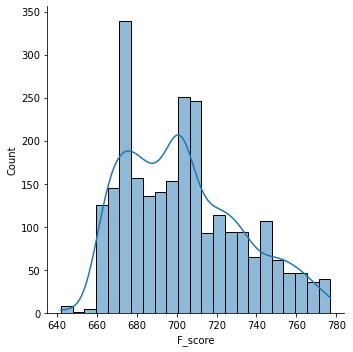

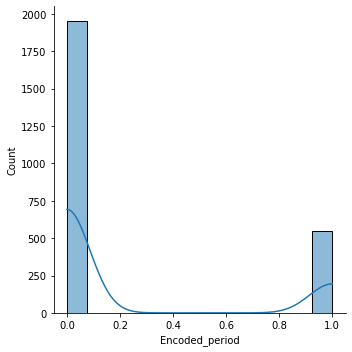

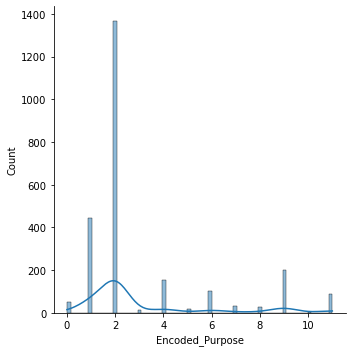

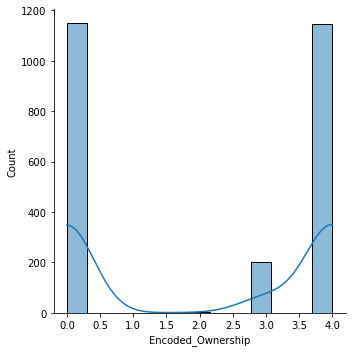

In [18]:
plt.figure(figsize=(20,18))
for column in loan_data.columns:
    if loan_data[column].dtype == float and int:
        sns.displot(data=loan_data[column],kde=True)

<AxesSubplot:>

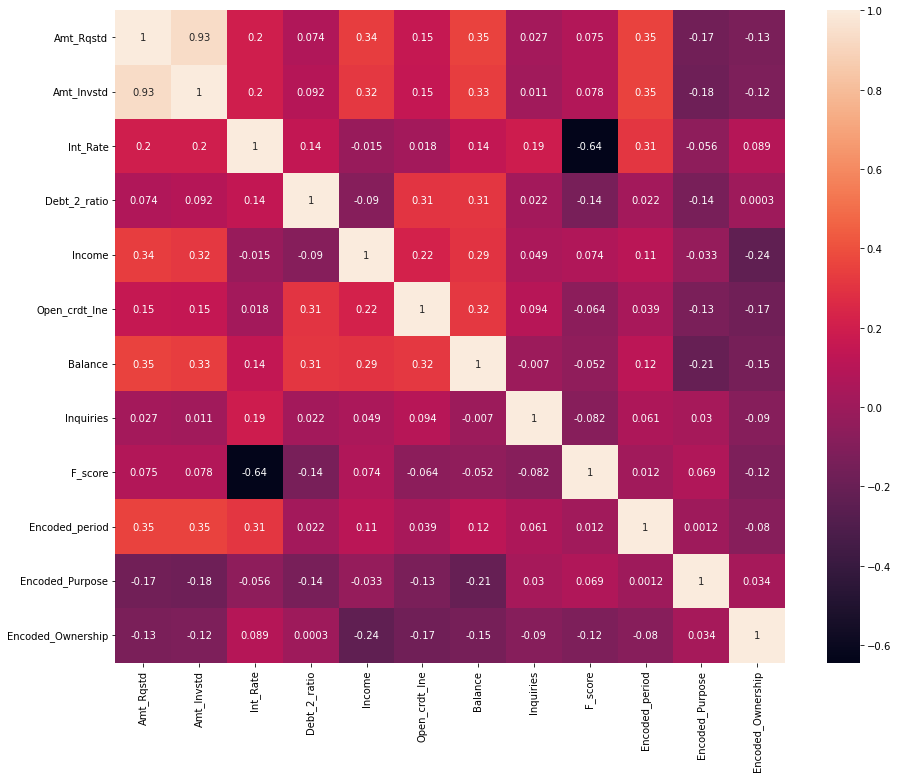

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(data=loan_data.corr(),annot=True)

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

#### Findings:-  test is inconsistent with our hypothesis.

In [20]:
#Ho = Interest rate is independent upon loan amounts
#Ha = Interest rate is depentent upon loan amounts

# C.I. = 95
# P = 0.05

stats.spearmanr(loan_data.Int_Rate,loan_data.Amt_Invstd)

SpearmanrResult(correlation=0.19036533494485616, pvalue=7.884007180728906e-22)

### Loan length is directly effecting intrest rate.

#### Findings:-  test is inconsistent with our hypothesis.

In [21]:
#Ho = Loan length is independent upon Interest rate
#Ha = Loan length is depentent upon Interest rate

# C.I. = 95
# P = 0.05

stats.pearsonr(loan_data.Int_Rate,loan_data.Encoded_period)        

(0.3119405172489035, 1.5033266281176247e-57)

### c. Intrest rate varies for different purpose of loans

#### Findings:-  test is inconsistent with our hypothesis.

In [22]:
S0 = loan_data.loc[loan_data.Encoded_Purpose == 0,'Int_Rate']
S1 = loan_data.loc[loan_data.Encoded_Purpose == 1,'Int_Rate']
S2 = loan_data.loc[loan_data.Encoded_Purpose == 2,'Int_Rate']
S3 = loan_data.loc[loan_data.Encoded_Purpose == 3,'Int_Rate']
S4 = loan_data.loc[loan_data.Encoded_Purpose == 4,'Int_Rate']
S5 = loan_data.loc[loan_data.Encoded_Purpose == 5,'Int_Rate']
S6 = loan_data.loc[loan_data.Encoded_Purpose == 6,'Int_Rate']
S7 = loan_data.loc[loan_data.Encoded_Purpose == 7,'Int_Rate']
S8 = loan_data.loc[loan_data.Encoded_Purpose == 8,'Int_Rate']
S9 = loan_data.loc[loan_data.Encoded_Purpose == 9,'Int_Rate']
S10 = loan_data.loc[loan_data.Encoded_Purpose == 10,'Int_Rate']
S11 = loan_data.loc[loan_data.Encoded_Purpose == 11,'Int_Rate']

In [23]:
#Ho = Interest rate is independent upon purpose of loans
#Ha = Interest rate is depentent upon purpose of loans

# C.I. = 95
# P = 0.05

print(stats.f_oneway(S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11))

F_onewayResult(statistic=7.651340238883028, pvalue=4.0072097885339836e-13)


### There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

#### Findings:- test is inconsistent with our hypothesis.

In [24]:
#Ho = FICO scores is independent upon Home Ownership
#Ha = FICO scores is depentent upon Home Ownership

# C.I. = 95
# P = 0.05

stats.spearmanr(loan_data.Encoded_Ownership,loan_data.F_score)

SpearmanrResult(correlation=-0.11593577243658243, pvalue=6.11791215552012e-09)

## problem 2   

In [25]:
# Importing data under "Price"
price = pd.read_csv(r'Price_Quotes.csv',index_col='Order_Number')

In [26]:
price.isnull().sum()

Barry_Price    0
Mary_Price     0
dtype: int64

### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

#### Findings :- There is deifference in Mary & Bary prices average

In [28]:
#Ho = u = Xi
#Ha = u <> Xi

# C.I. = 95
# P = 0.05

stats.ttest_rel(price.Mary_Price,price.Barry_Price)

Ttest_relResult(statistic=-2.521376510892349, pvalue=0.02840588045242053)

## Problem 3

In [29]:
# Importing data under "facility_data"
facility_data = pd.read_csv(r'Treatment_Facility.csv',index_col='Month')

In [30]:
facility_data.isnull().sum()

Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [31]:
# Renaming the columns
facility_data.rename(columns={'VAR4':'TRFF(%)','VAR5':'CI(%)'},inplace=True)

In [32]:
# Dividing the data imtp two parts based on "Prior" & "Post"

Prior = facility_data.loc[facility_data.Reengineer == 'Prior','CI(%)']

Post = facility_data.loc[facility_data.Reengineer == 'Post','CI(%)']

### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

#### Findings :- With the below analysis we can say that there is no effect of  reengineering

In [34]:
#Ho = u2 <= u1
#Ha = u2 > u1

# C.I. = 95
# P = 0.05

# Performing the statistical test
stats.f_oneway(Prior,Post)

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

In [35]:
#Ho = u2 <= u1
#Ha = u2 > u1

# C.I. = 95
# P = 0.05

# Performing the statistical test
stats.ttest_ind(Prior,Post)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

## Problem 4

In [36]:
# Importing data under "priority"
priority = pd.read_csv(r'Priority_Assessment.csv')

In [37]:
priority.isnull().sum()

Days        0
Priority    0
dtype: int64

In [38]:
# Dividing the data imtp two parts based on "High", "Medium" & "Low"

High = priority.loc[priority.Priority == 'High','Days']

Medium = priority.loc[priority.Priority == 'Medium','Days']

Low = priority.loc[priority.Priority == 'Low','Days']

### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

#### Findings :-  With the below analysis we can say that  prioritization system is not working

In [41]:
#Ho = u2 <= u1
#Ha = u2 > u1

# C.I. = 95
# P = 0.05

# Performing the statistical test
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

## Problem 5

In [42]:
# Importing data under "films"
films = pd.read_csv(r'Films.csv')

In [43]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [44]:
films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [45]:
# Creating a function "gender" to convert Male & female into '1'&'2'

def gender (x):
    if x.Gender == 'Male':
        return '1'
    elif x.Gender == 'Female':
        return '2'
    else:
        return x.Gender
    

In [46]:
# Applying function gender 
films.Gender = films.apply(gender,axis=1)

In [47]:
# Creating a function "Rel_status" to convert Single & Married into '1'&'2'

def Rel_status(x):
    if x.Marital_Status == 'Married':
        return '1'
    elif x.Marital_Status == 'Single':
        return '2'
    elif x.Marital_Status == 'Slngle' :
        return '2'
    else:
        return x.Marital_Status
        

In [48]:
# Applying function Rel_status 
films.Marital_Status = films.apply(Rel_status,axis=1)

In [49]:
# Filling up the NA values
for col in films.columns:
    films[col].fillna(films[col].mode()[0], inplace=True)

In [50]:
# Dropping the columns which are not necessary
films.drop(columns = '_rowstate_',inplace=True)

### What is the overall level of customer satisfaction?

#### Findings :-  From the below analysis we can say that 95% of customer are satisfied as 46% customer falls under category 1 which is "Excellent" & 49% customer falls under category 2 which is "Good"

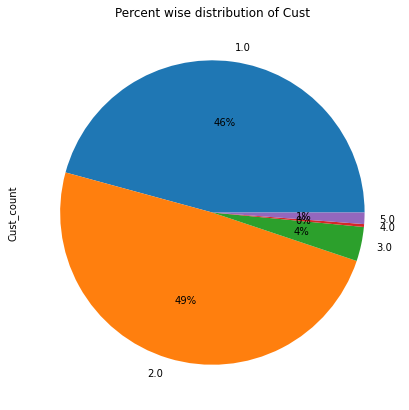

,Cust_count
Overall,
1.0,151
2.0,162
3.0,12
4.0,1
5.0,4


In [51]:
cust_satisfaction = films.groupby(by='Overall')[['Overall']].count()
cust_satisfaction.rename(columns={'Overall':'Cust_count'},inplace=True)

cust_satisfaction.Cust_count.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Percent wise distribution of Cust')

plt.show()
cust_satisfaction

### What factors are linked to satisfaction?

#### Findings :- variables like Sinage, Parking , clean affects the overall customer satisfaction

In [52]:
# Getting the necessary data for the analysis 
films.Sinage = films.Sinage.astype('float')
films.Parking = films.Parking.astype('float')
films.Clean = films.Clean.astype('float')
films.Overall = films.Overall.astype('float')

In [53]:
# Saving the data under "factors"
factors = films[['Clean','Parking','Sinage','Overall']]

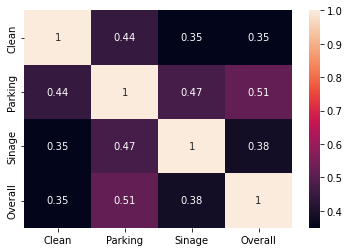

In [54]:
# creating a heatmap to study the correlation of the various variables with each other
sns.heatmap(data=factors.corr(),annot=True)
plt.show()

In [55]:
# Performing the statistical test
print(stats.f_oneway(factors.Clean,factors.Parking,factors.Sinage,factors.Overall))

F_onewayResult(statistic=7.286143154968725, pvalue=7.577748831602434e-05)


###  What is the demographic profile of Film on the Rocks patrons?

#### Findings:- From the below analysis we can say that out of total customer 65% of customer is "Female" as 2 is used for "Female"

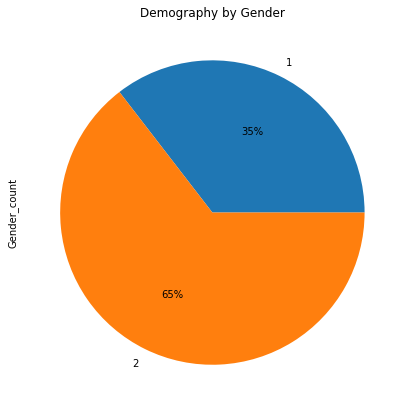

,Gender_count
Gender,
1,117
2,213


In [56]:
# Demography by Gender
Gender_Demography = films.groupby(by='Gender')[['Gender']].count()
Gender_Demography.rename(columns={'Gender':'Gender_count'},inplace=True)

Gender_Demography.Gender_count.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Gender')

plt.show()
Gender_Demography

#### Findings:- From the below analysis we can say that out of total customer 70% of customer is "Single" as 2 is used for "Single"

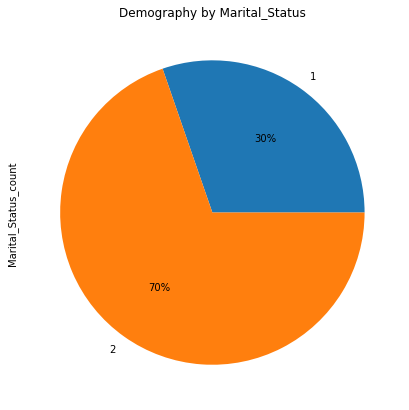

,Marital_Status_count
Marital_Status,
1,100
2,230


In [57]:
# Demography by Marital_Status
Marital_Status_Demography = films.groupby(by='Marital_Status')[['Marital_Status']].count()
Marital_Status_Demography.rename(columns={'Marital_Status':'Marital_Status_count'},inplace=True)

Marital_Status_Demography.Marital_Status_count.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Marital_Status')

plt.show()
Marital_Status_Demography

#### Findings:- From the below analysis we can say that out of total customer 54% of customer is from age group 13-30 & 35 % of customer is from age group 31-60

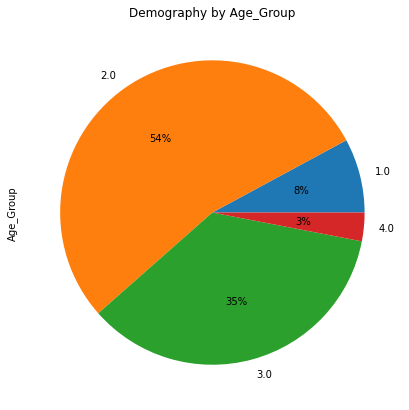

,Age_Group
Age,
1.0,26
2.0,177
3.0,117
4.0,10


In [58]:
# Demography by Age
Age_Demography = films.groupby(by='Age')[['Age']].count()
Age_Demography.rename(columns={'Age':'Age_Group'},inplace=True)

Age_Demography.Age_Group.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Age_Group')

plt.show()
Age_Demography

#### Findings:-  From the below analysis we can say that out of total customer 48% of customer is from Income group "Less than 50,000" & 27% of customer is from Income group "100,000+" & 25% customer is from Income group "50K-100K"

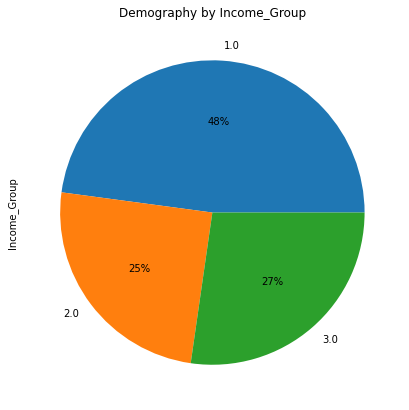

,Income_Group
Income,
1.0,158
2.0,82
3.0,90


In [59]:
# Demography by Income
Income_Demography = films.groupby(by='Income')[['Income']].count()
Income_Demography.rename(columns={'Income':'Income_Group'},inplace=True)

Income_Demography.Income_Group.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Income_Group')

plt.show()
Income_Demography

### In what media outlet(s) should the film series be advertised?

#### Findings:-  From the below analysis we can say that out of total customer 72% of customer heard about the Event through "word of mouth".

#### So "Word of Mouth" will be the best Media Outlet for future advertisement

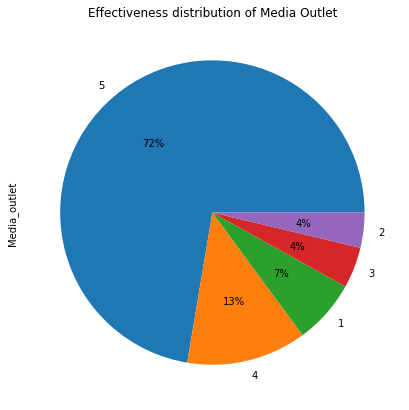

,Media_outlet
Hear_About,
5,233
4,41
1,22
3,14
2,12
"2,5",2
"3,4",2
"1,5",1
"3,5",1


In [60]:
media_Demography = films.groupby(by='Hear_About')[['Hear_About']].count()
media_Demography.rename(columns={'Hear_About':'Media_outlet'},inplace=True)

Top_5 = media_Demography['Media_outlet'].nlargest(5)

Top_5.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Effectiveness distribution of Media Outlet')

plt.show()
media_Demography.sort_values(by='Media_outlet',ascending=False)